# Assignment for Tools and Programming

This Assignment was created by:

Martin Brucker and Frederik Brinkmann

Deadline: 26.10.2023 11:59PM

# Fragen an Daddy Tillmann

- sollen wir den code schön machen und das auch im Notebook zeigen :)?

# TODO
sinks to do :)
- colums einheitlich umbenennen
- iwie was mit index machen weil der da soviel drüber gesprochen hat
- das jahr iwie als time formatieren? generell die dtypes schön machen
- df.isnull().sum / len(df) um zu guggen wieviel % fehlt

Was an daten schönmachen

- athlete nr = index? 
- born into date and place
- died into date and place
- Heigt + KG neu anlegen 
- split discipline into new columns

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing the data and cleaning

In [303]:
# importing data from files

results = pd.read_csv("data/results.csv")
athletes = pd.read_csv(filepath_or_buffer="data/athletes.txt", sep=";")

In [304]:
# merging with an inner join to merge the athlets with the results
merged_results_athletes = pd.merge(left = athletes, right = results, how="inner")

In [305]:
merged_results_athletes.head()

,athlete,name,sex,born,died,affiliations,title,measurements,year,season,sport,discipline,pos,medal,country,country_code,team
0,1.0,Jean-François•Blanchy,Male,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",NaN,NaN,NaN,1920,Summer,Tennis,"Singles, Men",32.0,NaN,France,FRA,NaN
1,1.0,Jean-François•Blanchy,Male,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",NaN,NaN,NaN,1920,Summer,Tennis,"Doubles, Mixed",8.0,NaN,France,FRA,Jeanne Vaussard
2,1.0,Jean-François•Blanchy,Male,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",NaN,NaN,NaN,1920,Summer,Tennis,"Doubles, Men",4.0,NaN,France,FRA,Jacques Brugnon
3,1.0,Jean-François•Blanchy,Male,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",NaN,NaN,NaN,1912,Summer,Tennis,"Singles, Men",17.0,NaN,France,FRA,NaN
4,1.0,Jean-François•Blanchy,Male,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",NaN,NaN,NaN,1912,Summer,Tennis,"Doubles, Men",NaN,NaN,France,FRA,Jean Montariol


### Data Cleaning

In [306]:
# each athlete as a row of the dataframe
merged_results_athletes.set_index("athlete", inplace=True)

In [307]:
# Split the "Born" column into "BirthDate" and "BirthLocation" columns
born_df = merged_results_athletes['born'].str.extract(r'(\d+ [A-Za-z]+ \d{4}) in (.*)').rename(columns={0: 'birthDate', 1: 'birthLocation'})

# Split the "Died" column into "DeathDate" and "DeathLocation" columns
died_df = merged_results_athletes['died'].str.extract(r'(\d+ [A-Za-z]+ \d{4}) in (.*)').rename(columns={0: 'deathDate', 1: 'deathLocation'})

# Merge the Date and Location DataFrames with the original DataFrame
merged_results_athletes = pd.concat([merged_results_athletes, born_df, died_df], axis=1)

merged_results_athletes.drop(columns=['born', 'died'], inplace=True)

In [308]:
# Create separate DataFrames for Height and Weight
height_df = merged_results_athletes['measurements'].str.extract(r'(\d+ cm)').rename(columns={0: 'height'})
weight_df = merged_results_athletes['measurements'].str.extract(r'(\d+ kg)').rename(columns={0: 'weight'})

# Convert the extracted values to numeric and fill NaN values with -1
height_df['height'] = height_df['height'].str.extract(r'(\d+)').astype(float)
weight_df['weight'] = weight_df['weight'].str.extract(r'(\d+)').astype(float)
# Merge the Height and Weight DataFrames with the original DataFrame
merged_results_athletes = pd.concat([merged_results_athletes, height_df, weight_df], axis=1)

merged_results_athletes.drop('measurements', axis=1, inplace=True)

In [309]:
merged_results_athletes['firstName'] = merged_results_athletes['name'].str.split('•').str[0]
merged_results_athletes['lastName'] = merged_results_athletes['name'].str.split('•').str[-1]

merged_results_athletes.drop(columns='name', inplace=True)


In [310]:
merged_results_athletes

,sex,affiliations,title,year,season,sport,discipline,pos,medal,country,country_code,team,birthDate,birthLocation,deathDate,deathLocation,height,weight,firstName,lastName
athlete,,,,,,,,,,,,,,,,,,,,
1.0,Male,NaN,NaN,1920,Summer,Tennis,"Singles, Men",32.0,NaN,France,FRA,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",NaN,NaN,Jean-François,Blanchy
1.0,Male,NaN,NaN,1920,Summer,Tennis,"Doubles, Mixed",8.0,NaN,France,FRA,Jeanne Vaussard,12 December 1886,"Bordeaux, Gironde (FRA)",2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",NaN,NaN,Jean-François,Blanchy
1.0,Male,NaN,NaN,1920,Summer,Tennis,"Doubles, Men",4.0,NaN,France,FRA,Jacques Brugnon,12 December 1886,"Bordeaux, Gironde (FRA)",2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",NaN,NaN,Jean-François,Blanchy
1.0,Male,NaN,NaN,1912,Summer,Tennis,"Singles, Men",17.0,NaN,France,FRA,NaN,12 December 1886,"Bordeaux, Gironde (FRA)",2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",NaN,NaN,Jean-François,Blanchy
1.0,Male,NaN,NaN,1912,Summer,Tennis,"Doubles, Men",NaN,NaN,France,FRA,Jean Montariol,12 December 1886,"Bordeaux, Gironde (FRA)",2 October 1960,"Saint-Jean-de-Luz, Pyrénées-Atlantiques (FRA)",NaN,NaN,Jean-François,Blanchy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147801.0,Male,NaN,NaN,2020,Summer,Athletics,"Marathon, Men",76.0,NaN,Honduras,HON,NaN,8 February 1994,"Barcelona, Barcelona (ESP)",NaN,NaN,NaN,NaN,Iván,Zarco
147802.0,Male,NaN,NaN,1920,Summer,Rowing,"Coxed Pairs, Men",NaN,NaN,Belgium,BEL,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,René,Van Damme
147803.0,Male,NaN,NaN,2020,Summer,Swimming,"4 × 200 metres Freestyle Relay, Men",13.0,NaN,Republic of Korea,KOR,Republic of Korea,NaN,NaN,NaN,NaN,NaN,NaN,Lee,Yoo-Yeon


In [317]:
# transform the birth date into a datetime object
merged_results_athletes['birthDate'] = pd.to_datetime(merged_results_athletes['birthDate'], format="%d %B %Y", errors='coerce')
merged_results_athletes['deathDate'] = pd.to_datetime(merged_results_athletes['deathDate'], format="%d %B %Y", errors='coerce')

In [313]:
merged_results_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291710 entries, 1.0 to 147804.0
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sex            291710 non-null  object        
 1   affiliations   198770 non-null  object        
 2   title          834 non-null     object        
 3   year           291710 non-null  int64         
 4   season         291710 non-null  object        
 5   sport          291710 non-null  object        
 6   discipline     291710 non-null  object        
 7   pos            222296 non-null  float64       
 8   medal          41913 non-null   object        
 9   country        291710 non-null  object        
 10  country_code   291710 non-null  object        
 11  team           114693 non-null  object        
 12  birthDate      246015 non-null  datetime64[ns]
 13  birthLocation  246015 non-null  object        
 14  deathDate      51319 non-null   object        
 15  d

#### Exercise 1
- What is the name of the most successful athlete since 2012, as measured by the number of gold
medals?

In [314]:
gold_medals = merged_results_athletes[merged_results_athletes['medal'] == 'Gold']

gold_medal_counts = gold_medals.groupby(['firstName', 'lastName'])['medal'].count().reset_index()

athlete_with_most_gold = gold_medal_counts[gold_medal_counts['medal'] == gold_medal_counts['medal'].max()]

print(athlete_with_most_gold)

# TODO noch schönen outkot machen :)!

     firstName lastName  medal
6971   Michael   Phelps     23


- How many different athletes have participates in the Olympic Games since 2012?

In [315]:
# checking wich athletes have participated in the year 2012 or later
since2012 = merged_results_athletes[merged_results_athletes['year'] >= 2012]

# print how many unique values are in the index
print(f"There are {since2012.index.nunique()} athletes that have participated since 2012.")

There are 29655 athletes that have participated since 2012.


- What are the 10 countries with the lowest ratio of female participants? Represent this information using a bar chart

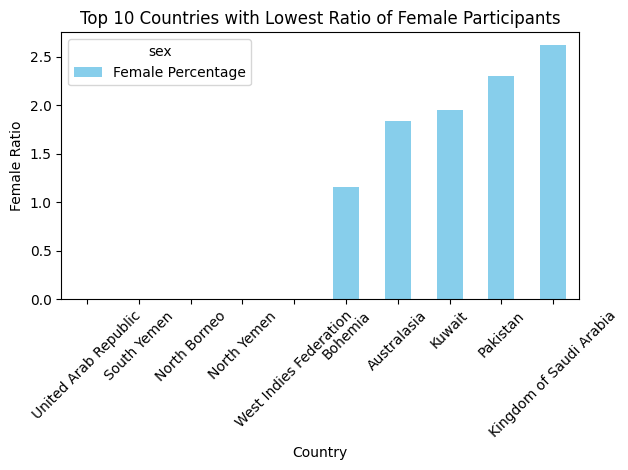

In [319]:
# Returns the ammount of male and female per country
perCountry = merged_results_athletes.groupby(['country', 'sex']).size().unstack(fill_value=0)
# Calculate the female percantage per country :)
perCountry['Female Percentage'] = (perCountry['Female'] / (perCountry['Female'] + perCountry['Male'])) * 100

# Give out the first 10 results
perCountry = perCountry.sort_values("Female Percentage").head(10)


# Print the top 10 Countries with Lowest Ratio of Female Participantsplt.figure(figsize=(12, 6))
perCountry[["Female Percentage"]].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Lowest Ratio of Female Participants')
plt.xlabel('Country')
plt.ylabel('Female Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exersise 2

- What are the three most common firstnames of female athletes from the country ‘Republic of
Korea’?


In [320]:
# Select female Korean athletes
female_korean_athletes = merged_results_athletes[(merged_results_athletes['sex'] == 'Female') & (merged_results_athletes['country'] == 'Republic of Korea')]

# Drop duplicates based on the athlete's name
female_korean_athletes_unique = female_korean_athletes.drop_duplicates(subset=['firstName', 'lastName'])

# Count the occurrences of each unique first name
common_first_names = female_korean_athletes_unique['firstName'].value_counts()

# Find the most common first name
most_common_first_name = common_first_names.idxmax()

# Print the most common first name and its count
print("The most common first name among female Korean athletes is:", most_common_first_name)
print("Count:", common_first_names.head(3))


The most common first name among female Korean athletes is: Kim
Count: firstName
Kim     166
Lee     120
Park     70
Name: count, dtype: int64


- Who is the tallest female athlete? Provide the name, height, country and sport.

In [321]:
female_athletes = merged_results_athletes[(merged_results_athletes['sex'] == 'Female')]
female_athletes = female_athletes.dropna(subset=['height'])  
tallest_female = female_athletes.loc[female_athletes['height'].idxmax()]

# Extract the desired information
name = f"{tallest_female['firstName']} {tallest_female['lastName']}"
height = tallest_female['height']
country = tallest_female['country']
sport = tallest_female['sport']

# Print the information
print("Tallest Female Participant:")
print(f"Name: {name}")
print(f"Height: {height}")
print(f"Country: {country}")
print(f"Sport: {sport}")


Tallest Female Participant:
Name: Margo Dydek
Height: 213.0
Country: Poland
Sport: Basketball 


- What are the 10 sports with the highest average weight of participants? Provide the sport and the
weight.

In [322]:
highest_weight = merged_results_athletes.groupby('sport')['weight'].mean().sort_values(ascending=False).head(10)
print(highest_weight)

sport
Tug-Of-War         97.066667
3x3 Basketball     90.500000
Bobsleigh          89.766070
Baseball           85.739181
Basketball         85.708784
Water Polo         84.653375
Handball           81.584141
Ice Hockey         80.705214
Rugby              80.411765
Rowing             79.961337
Name: weight, dtype: float64


- What are the 3 sports with the largest number of participants that are severely underweight?
Provide the sport and the number of severely underweight participants. Severe underweight is
defined by a body-mass-index (BMI) smaller than 16, where BMI is calculate as weight/height2
in the unit kg/m2

In [331]:
# Calculate the BMI of each athlete
merged_results_athletes['BMI'] = merged_results_athletes['weight'] / (merged_results_athletes['height'] / 100) ** 2

# Find athletes with BMI < 16
underweight_athletes = merged_results_athletes[merged_results_athletes['BMI'] < 16]
underweight_athletes.drop_duplicates(subset=['firstName', 'lastName'], inplace=True)


# Count the number of athletes in each sport
underweight_athletes_per_sport = underweight_athletes.groupby('sport').size().sort_values(ascending=False)

# Print the top sport
print("Sport with the most underweight athletes:", underweight_athletes_per_sport.idxmax())
print("Number of underweight athletes:", underweight_athletes_per_sport.max())

Sport with the most underweight athletes: Rhythmic Gymnastics 
Number of underweight athletes: 90


/tmp/ipykernel_25303/2915951413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underweight_athletes.drop_duplicates(subset=['firstName', 'lastName'], inplace=True)


# Exercise 3

- For the following two questions you need to calculate the age of particantants. We define age as the
number of completed years at the beginning of the Olympic Games at which the athlete participates.
To calculate the age you need to (1) leverage the information about the date of birth and you (2) need
to consider the date when the Olympic Games were opened.


Who is the oldest athlete? Provide the name and the age.

In [362]:
# Calculate the age of each athlete
merged_results_athletes['age'] = merged_results_athletes['year'] - merged_results_athletes['birthDate'].dt.year

# Find the oldest athlete
oldest_athletes = merged_results_athletes.loc[merged_results_athletes['age'].idxmax()]

# print who is the olders athlete with firstName and lastName and age

oldest_athletes.head(1)[['firstName', 'lastName', 'age']]

,firstName,lastName,age
athlete,,,
44288.0,Oscar,Swahn,73.0


- What are the 10 sports with the highest average age of participants? Provide the sport and the
average age.

In [398]:
# what are the 10 sports with the highest average age of athletes
#average_age_per_sport = merged_results_athletes.groupby('sport')['age'].unique().dropna()
#müssen wir mal gucken wegeen duplicats yk yk 
average_age_per_sport = merged_results_athletes.groupby('sport')['age'].mean().dropna()

average_age_per_sport

average_age_per_sport.sort_values(ascending=False).head(10)



sport
Roque                   52.750000
Equestrian Driving      42.233333
Art Competitions        41.021978
Equestrian Dressage     39.080123
Polo                    35.888889
Equestrian Jumping      34.590728
Motorboating            34.266667
Shooting                33.824407
Equestrian Eventing     33.661703
Croquet                 33.588235
Name: age, dtype: float64

# Exerzise 4

Calculate the medal table for the Summer Olympic Games 2016 in Rio de Janeiro. See the official medal
table as a reference. Your medal table should have the same structure (same column names and same
sorting) as the official medal table. Display the top 10 countries.

Hint: In team events such as Basketball, all team members of the winning team receive a gold medal,
but for the medal table it should only count as one gold medal. The same logic also applies to silver and
bronze medals. You can recognize team events either by the fact that multiple particantants have won
the same medal in one event event (combination of sport and discipline), or via the column team (which
is then non-missing)

Rank | Noc | Gold | Silver | Bronze | Total


In [443]:
results = pd.read_csv("data/results.csv")

In [507]:
# Filter the dataset to include only the 2016 Summer Olympics in Rio de Janeiro
rio_2016_data = results[(results['year'] == 2016) & (results['season'] == 'Summer')]
rio_2016_data.head(100)

# Create a copy of the dataset to work with
medal_table = rio_2016_data.copy()

# For team events, remove duplicate rows and keep one representative row for each event
medal_table.drop_duplicates(subset=['sport', 'discipline', 'pos', "country"], keep='first', inplace=True)

# Create columns for gold, silver, and bronze medals with initial values of 0
medal_table['gold'] = 0
medal_table['silver'] = 0
medal_table['bronze'] = 0

# Assign medals based on medal positions
medal_table.loc[medal_table['medal'] == 'Gold', 'gold'] = 1
medal_table.loc[medal_table['medal'] == 'Silver', 'silver'] = 1
medal_table.loc[medal_table['medal'] == 'Bronze', 'bronze'] = 1

# Group the data by country and calculate the sum of gold, silver, and bronze medals
medal_table = medal_table.groupby('country').agg({'gold': 'sum', 'silver': 'sum', 'bronze': 'sum'}).reset_index()

# Calculate total medals for each country
medal_table['total'] = medal_table['gold'] + medal_table['silver'] + medal_table['bronze']

# Sort the medal table by gold, silver, and bronze medals in descending order
medal_table.sort_values(['gold', 'silver', 'bronze'], ascending=[False, False, False], inplace=True)

# Display the top 10 countries in the medal table
top_10_countries = medal_table
print(top_10_countries)


                        country  gold  silver  bronze  total
197               United States    46      37      38    121
72                Great Britain    27      23      17     67
144  People's Republic of China    26      18      26     70
155          Russian Federation    19      17      20     56
70                      Germany    17      10      17     44
..                          ...   ...     ...     ...    ...
199                     Uruguay     0       0       0      0
201                     Vanuatu     0       0       0      0
204                       Yemen     0       0       0      0
205                      Zambia     0       0       0      0
206                    Zimbabwe     0       0       0      0

[207 rows x 5 columns]


In [510]:
rio_2016_data = results[(results['year'] == 2016) & (results['season'] == 'Summer')]
rio_2016_data.head(100)


,athlete,year,season,sport,discipline,pos,medal,country,country_code,team
19128,287,2016,Summer,Tennis,"Doubles, Men",17.0,NaN,India,IND,Rohan Bopanna
19129,693,2016,Summer,Table Tennis,"Singles, Men",4.0,NaN,Belarus,BLR,NaN
19130,757,2016,Summer,Tennis,"Doubles, Men",4.0,NaN,Canada,CAN,Vasek Pospisil
19131,1014,2016,Summer,Table Tennis,"Singles, Women",49.0,NaN,Nigeria,NGR,NaN
19132,1027,2016,Summer,Table Tennis,"Singles, Men",33.0,NaN,Nigeria,NGR,NaN
...,...,...,...,...,...,...,...,...,...,...
19223,50214,2016,Summer,Swimming,"50 metres Freestyle, Women",15.0,NaN,Sweden,SWE,NaN
19224,52988,2016,Summer,Volleyball,"Volleyball, Men",4.0,NaN,Russian Federation,RUS,Russian Federation
19225,61050,2016,Summer,Sailing,"Windsurfer, Women",19.0,NaN,Greece,GRE,NaN
19226,62076,2016,Summer,Sailing,"Windsurfer, Men",25.0,NaN,Hungary,HUN,NaN


#### Exerzise pfümf

In [511]:
import requests
import pandas as pd

# Make the API request
# SP.POP.TOTL for the indicator total propulation
# format = json to get a json file, the defaut is xml wich would need a external package to process
# date = 2016 to limit the returns only to the year in question wich is 2016
# per_page = 5000 to list all entrys in a single api request

url = "http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&date=2016&per_page=5000"
response = requests.get(url)

data = response.json()[1]

In [512]:
transformed_data = []

# Iterate through the data and extract the relevant fields
for entry in data:
    transformed_entry = {
        'Indicator ID': entry['indicator']['id'],
        'Indicator Value': entry['indicator']['value'],
        'Country ID': entry['country']['id'],
        'Country Value': entry['country']['value'],
        'Country ISO3 Code': entry['countryiso3code'],
        'Date': entry['date'],
        'Value': entry['value'],
        'Unit': entry['unit'],
        'Obs Status': entry['obs_status'],
        'Decimal': entry['decimal']
    }
    transformed_data.append(transformed_entry)

# Create a DataFrame from the transformed data
df = pd.DataFrame(transformed_data)

# Now you have a Pandas DataFrame that represents your dataset
# You can perform various data operations and analysis with it

In [533]:
# Filter the dataset to include only the 2016 Summer Olympics in Rio de Janeiro
rio_2016_data = results[(results['year'] == 2016) & (results['season'] == 'Summer')]

# Create a copy of the dataset to work with
medal_table = rio_2016_data.copy()

# For team events, remove duplicate rows and keep one representative row for each event
medal_table.drop_duplicates(subset=['sport', 'discipline', 'pos', "country"], keep='first', inplace=True)

# Create columns for gold, silver, and bronze medals with initial values of 0
medal_table['gold'] = 0
medal_table['silver'] = 0
medal_table['bronze'] = 0

# Assign medals based on medal positions
medal_table.loc[medal_table['medal'] == 'Gold', 'gold'] = 1
medal_table.loc[medal_table['medal'] == 'Silver', 'silver'] = 1
medal_table.loc[medal_table['medal'] == 'Bronze', 'bronze'] = 1

# Group the data by country and country_code and calculate the sum of gold, silver, and bronze medals
medal_table = medal_table.groupby(['country', 'country_code']).agg({'gold': 'sum', 'silver': 'sum', 'bronze': 'sum'}).reset_index()

# Calculate total medals for each country
medal_table['total'] = medal_table['gold'] + medal_table['silver'] + medal_table['bronze']

# Sort the medal table by gold, silver, and bronze medals in descending order
medal_table.sort_values(['gold', 'silver', 'bronze'], ascending=[False, False, False], inplace=True)

df = df[["Country ISO3 Code","Value"]]

merged2016 = top_10_countries.merge(df, left_on="country_code", right_on="Country ISO3 Code")

merged2016['Gold Medals per Million Inhabitants'] = (merged2016['gold'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Silver Medals per Million Inhabitants'] = (merged2016['silver'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Bronze Medals per Million Inhabitants'] = (merged2016['bronze'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Total Medals per Million Inhabitants'] = (merged2016['total'] / (merged2016['Value'] / 1000000)).round(2)

sorted_data = merged2016.sort_values('Gold Medals per Million Inhabitants', ascending=False)


In [515]:
df = df[["Country ISO3 Code","Value"]]

In [521]:
merged2016 = top_10_countries.merge(df, left_on="country_code", right_on="Country ISO3 Code")

In [527]:
merged2016['Gold Medals per Million Inhabitants'] = (merged2016['gold'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Silver Medals per Million Inhabitants'] = (merged2016['silver'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Bronze Medals per Million Inhabitants'] = (merged2016['bronze'] / (merged2016['Value'] / 1000000)).round(2)
merged2016['Total Medals per Million Inhabitants'] = (merged2016['total'] / (merged2016['Value'] / 1000000)).round(2)

sorted_data = merged2016.sort_values('Gold Medals per Million Inhabitants', ascending=False)

In [532]:
merged2016.sort_values('Total Medals per Million Inhabitants', ascending=False).head(10).drop(columns=['Country ISO3 Code', 'country_code'])

,country,gold,silver,bronze,total,Value,Gold Medals per Million Inhabitants,Silver Medals per Million Inhabitants,Bronze Medals per Million Inhabitants,Total Medals per Million Inhabitants
37,Bahrain,1,1,0,2,425994.0,2.35,2.35,0.00,4.69
13,Jamaica,6,3,2,11,2802695.0,2.14,1.07,0.71,3.92
15,New Zealand,4,9,5,18,4714100.0,0.85,1.91,1.06,3.82
29,Georgia,2,1,4,7,3727505.0,0.54,0.27,1.07,1.88
30,Azerbaijan,1,7,10,18,9757812.0,0.10,0.72,1.02,1.84
9,Hungary,8,3,4,15,9814023.0,0.82,0.31,0.41,1.53
33,Armenia,1,3,0,4,2865835.0,0.35,1.05,0.00,1.40
45,Lithuania,0,1,3,4,2868231.0,0.00,0.35,1.05,1.39
8,Australia,8,11,10,29,24190907.0,0.33,0.45,0.41,1.20
23,Serbia,2,4,2,8,7058322.0,0.28,0.57,0.28,1.13
